In [1]:
from teleconnections import Teleconnection

In [3]:
tc = Teleconnection(model='ERA5', exp='era5', source='monthly', telecname='NAO', loglevel='INFO')

2024-03-19 00:00:13 :: Teleconnection :: INFO     -> No regrid will be performed, be sure that the data is already at low resolution
2024-03-19 00:00:13 :: Teleconnection :: INFO     -> No time aggregation will be performed, be sure that the data is already at the desired frequency


2024-03-19 00:00:13 :: Teleconnection :: INFO     -> Namelist loaded
2024-03-19 00:00:13 :: Reader :: INFO     -> Fix names in metadata is ERA5-destine-v1
2024-03-19 00:00:13 :: Reader :: INFO     -> Fix names ERA5-destine-v1 found in fixes files
2024-03-19 00:00:14 :: Reader :: INFO     -> Grid metadata is era5-r025
<frozen importlib._bootstrap>:241: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 16 from C header, got 96 from PyObject
2024-03-19 00:00:17 :: Teleconnection :: INFO     -> Reader initialized


In [4]:
tc.evaluate_index()

2024-03-19 00:00:28 :: Teleconnection :: INFO     -> No retrieve has been performed, trying to retrieve
2024-03-19 00:00:28 :: Reader :: INFO     -> Retrieving variables: ['msl']
2024-03-19 00:00:28 :: Reader :: INFO     -> Retrieving variables: ['msl']
2024-03-19 00:00:30 :: Reader :: INFO     -> Variables to be fixed: {'msl': {'grib': True, 'source': 'MSL'}}
2024-03-19 00:00:30 :: Reader :: INFO     -> msl: converting units Pa --> Pa
2024-03-19 00:00:30 :: Reader :: INFO     -> coordinates adjusted to cf by AQUA fixer
2024-03-19 00:00:30 :: Teleconnection :: INFO     -> Data retrieved
2024-03-19 00:02:02 :: Teleconnection :: INFO     -> Index evaluated


In [5]:
from scipy.stats import bootstrap

In [11]:
tc.index.values

array([-2.44986224e+00, -1.59640431e+00, -7.82316089e-01,  1.19623646e-01,
        1.93141654e-01,  1.47813797e-01, -2.25747883e-01, -2.69235164e-01,
        5.35951369e-02,  1.85153577e-02, -9.15872812e-01, -1.50094032e+00,
       -1.83957684e+00, -1.16695750e+00, -9.19090390e-01, -3.65085363e-01,
        2.19972998e-01,  2.50994444e-01, -1.51216403e-01, -8.41854930e-01,
       -8.32929373e-01, -5.01314342e-01,  3.97407830e-01, -9.94780838e-01,
       -1.85586464e+00, -2.44569921e+00, -1.16937077e+00, -6.60448074e-01,
       -2.81605572e-01, -1.14290230e-02,  5.38617671e-01,  6.68334305e-01,
       -1.69126689e-01, -1.75702736e-01, -6.28145099e-01,  9.67759907e-01,
        8.48354995e-01,  1.80288506e+00,  9.33943450e-01,  9.66882765e-01,
        2.26735324e-01, -1.19554177e-01,  6.11073598e-02,  2.20563784e-01,
        5.78732848e-01,  4.68467236e-01,  6.39616907e-01, -2.43447945e-02,
       -1.08444571e+00, -1.62018156e+00, -1.04604840e+00, -3.62394959e-01,
       -7.75985539e-01, -

In [13]:
from scipy.stats import bootstrap
import numpy as np

test = bootstrap(data=(tc.index.values,), method='percentile', n_resamples=200, statistic=np.mean)


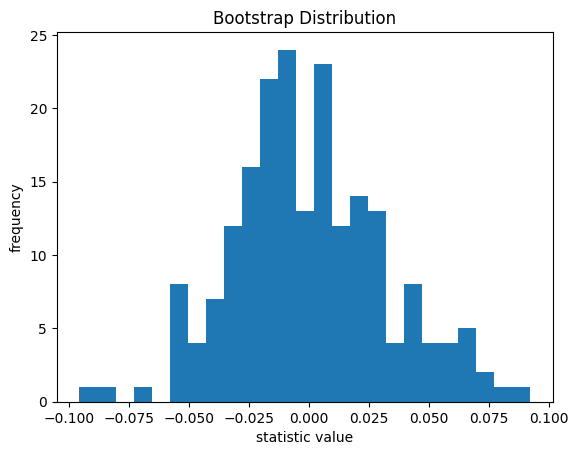

In [15]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots()

ax.hist(test.bootstrap_distribution, bins=25)

ax.set_title('Bootstrap Distribution')

ax.set_xlabel('statistic value')

ax.set_ylabel('frequency')

plt.show()